In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns

import sys
sys.path.append('/ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/src/')
import _config

sys.path.append('/home/unix/maxwshen/')
from mylib import util

notebook_nm = 'fig_plot_full_trajectories'
results_dir = _config.RESULTS_PLACE + f'{notebook_nm}/'
util.ensure_dir_exists(results_dir)

Using data folder:
 /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/data/


In [2]:
## Load data

true_df = pd.read_csv('/ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/out/pb_e_form_dataset/badran_pacbio_pivot_1pct.csv')
true_df = true_df.rename(columns = {col: int(col.replace('hrs', '')) for col in true_df.columns if 'hrs' in col})

true_df.to_csv(results_dir + f'pacbio_ground_truth.csv')

hrs_cols = [col for col in true_df.columns if col != 'Abbrev genotype']
idx_to_hr = {str(idx): col for idx, col in enumerate(hrs_cols)}
true_times = [s for s in true_df.columns if s != 'Abbrev genotype']
idx_to_time = {str(idx): t for idx, t in enumerate(true_times)}

## true

Saving to /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/results/fig_plot_full_trajectories/pacbio_ground_truth.pdf ...


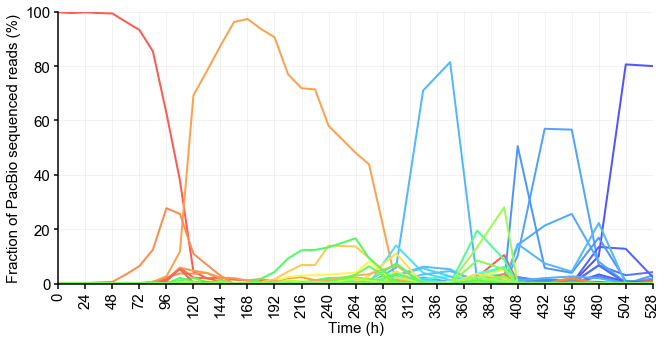

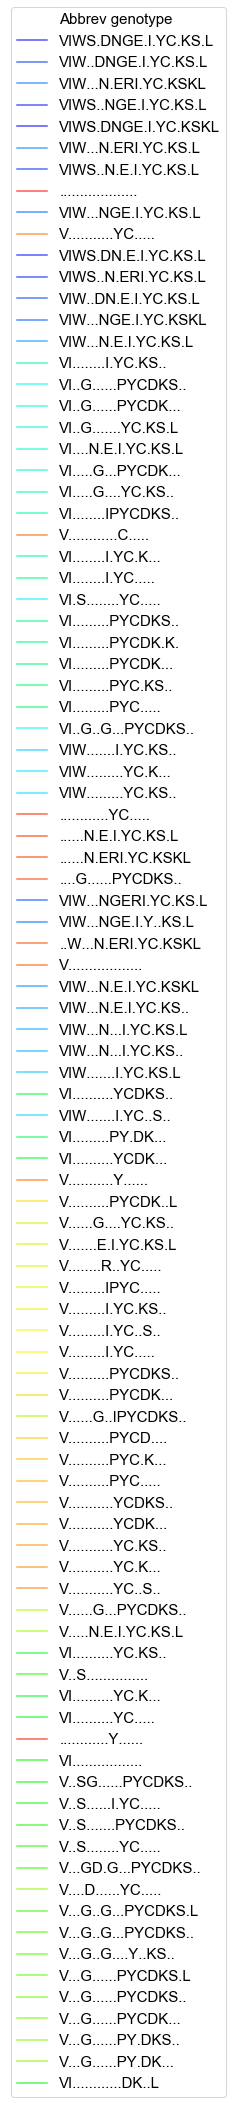

In [3]:
out_fn = results_dir + f'pacbio_ground_truth.pdf'
title = 'PacBio ground truth'

df = true_df

true_times = [s for s in true_df.columns if s != 'Abbrev genotype']
idx_to_time = {str(idx): t for idx, t in enumerate(true_times)}

# filter_num = 15
# print(f'Plotting only gt trajectories: top {filter_num}. Trimming {len(df)} ...')
# df['max fq'] = df.apply('max', axis = 'columns')
# df = df.sort_values(by = 'max fq', ascending = False)
# df = df.iloc[:filter_num]
# print(f'Trimmed to {len(df)} gts.')
# df = df.drop(columns = ['max fq'])

melt_df = df.melt(
    id_vars = 'Abbrev genotype',
    var_name = 'Time',
    value_name = 'Frequency (%)',
)
melt_df['Frequency (%)'] *= 100

gts = sorted(list(set(df['Abbrev genotype'])))
# colors = sns.color_palette('hls', int(len(gts) * 1.5))
colors = sns.hls_palette(n_colors = int(len(gts) * 1.5), s = 0.95, l = 0.65)
master_palette = {gt: color for gt, color in zip(gts, colors)}

#
import matplotlib
matplotlib.rc('font', family = 'Arial', size = 15)
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
#

fig, ax = plt.subplots(figsize = (9.5, 5))

sns.lineplot(
    x = 'Time',
    y = 'Frequency (%)',
    hue = 'Abbrev genotype',
    palette = master_palette,
    ci = None,
    data = melt_df,
    linewidth = 2,
    ax = ax,
)
# plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
ax.get_legend().remove()
plt.xticks(rotation = 90)
plt.grid(alpha = 0.2)
plt.ylim(bottom = 0, top = 100)
plt.xlim(left = 0, right = 528)
plt.xticks(np.arange(0, 528 + 24, 24))
plt.xlabel('Time (h)')
plt.ylabel('Fraction of PacBio sequenced reads (%)')

# if title != '':
#     plt.title(title)

plt.tight_layout()

##

sns.despine(trim = True)
ax.tick_params(length = 4.5, color = 'black', width = 1.5)
for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(1.5)
    ax.spines[axis].set_color('black')

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

print(f'Saving to {out_fn} ...')
plt.savefig(out_fn, transparent = True, bbox_inches = 'tight')

plt.show()
plt.close()
##


'''
    Save legend figure separately
    https://stackoverflow.com/questions/4534480/get-legend-as-a-separate-picture-in-matplotlib
'''
fig_leg = plt.figure(figsize = (3, 3))
ax_leg = fig_leg.add_subplot(111)

# add the legend from the previous axes
ax_leg.legend(
    *ax.get_legend_handles_labels(), 
    loc = 'center',
    handler_map = {}
)

# hide the axes frame and the x/y labels
ax_leg.axis('off')

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
fig_leg.savefig(results_dir + 'pacbio_ground_truth_legend.pdf', transparent = True, bbox_inches = 'tight')

plt.show()
plt.close()
##

## any

In [4]:
def plot_inferred_trajectories(modelexp = 'modelexp_illumina', model_id = '0', out_fn = '', title = ''):
    prj_dir = '/ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/out/_fitness_from_reads_pt_multi/'
    df = pd.read_csv(f'{prj_dir}/{modelexp}/model_{model_id}/_final_genotype_matrix.csv', index_col = 0)
    df = df.rename(columns = idx_to_time)
    
    df['Abbrev genotype'] = df.index
    df = df.reset_index(drop = True)
    csv_out_fn = '.'.join(out_fn.split('.')[:-1]) + '.csv'
    df.to_csv(f'{csv_out_fn}')
    
    melt_df = df.melt(
        id_vars = 'Abbrev genotype',
        var_name = 'Time',
        value_name = 'Frequency (%)',
    )
    melt_df['Frequency (%)'] *= 100
    
    melt_df['Time'] = melt_df['Time'].astype(int)
    melt_df = melt_df.sort_values(by = 'Time', ascending = True)
    
    #
    import matplotlib
    matplotlib.rc('font', family = 'Arial', size = 15)
    matplotlib.rcParams['mathtext.fontset'] = 'custom'
    matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
    #
    
    fig, ax = plt.subplots(figsize = (9.5, 5))

    gts = sorted(list(set(df['Abbrev genotype'])))
    colors = sns.color_palette('hls', int(len(gts) * 1.5))
    palette = {gt: master_palette[gt] if gt in master_palette else '#b6b9bc' for gt in gts}
    #     for gt in gts:
    #         if gt not in master_palette:
    #             print(gt)
    
    sns.lineplot(
        x = 'Time',
        y = 'Frequency (%)',
        hue = 'Abbrev genotype',
        palette = palette,
        ci = None,
        data = melt_df,
#         linewidth = 1.5,
        linewidth = 2,
        ax = ax,
    )
    # plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
    ax.get_legend().remove()
    plt.xticks(rotation = 90)
    plt.grid(alpha = 0.2)
    plt.ylim(bottom = 0, top = 100)
    plt.xlim(left = 0, right = 528)
    plt.xticks(np.arange(0, 528 + 24, 24))
    plt.xlabel('Time (h)')
    plt.ylabel('Predicted fraction of sequenced reads (%)')
    
    # if title != '':
    #     plt.title(title)
    
    plt.tight_layout()

    ##

    sns.despine(trim = True)
    ax.tick_params(length = 4.5, color = 'black', width = 1.5)
    for axis in ['bottom', 'left']:
        ax.spines[axis].set_linewidth(1.5)
        ax.spines[axis].set_color('black')

    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42

    print(f'Saving to {out_fn} ...')
    plt.savefig(out_fn, transparent = True, bbox_inches = 'tight')

    plt.show()
    plt.close()
    ##
    
    return


Saving to /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/results/fig_plot_full_trajectories/ill_rl1_rs0.pdf ...


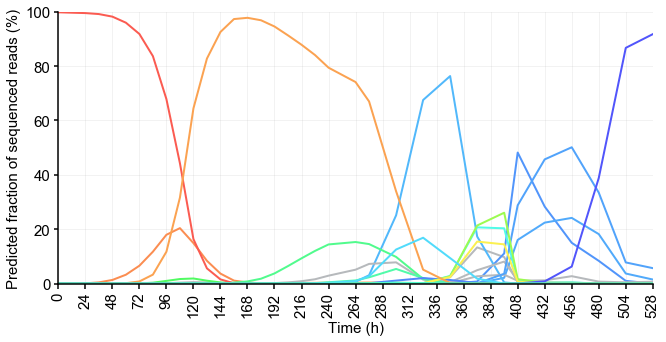

In [15]:
plot_inferred_trajectories(
    modelexp = 'modelexp_illumina', 
    model_id = '0', 
    out_fn = results_dir + 'ill_rl1_rs0.pdf', 
    title = '',
)

Saving to /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/results/fig_plot_full_trajectories/ill_rl100_rs0.pdf ...


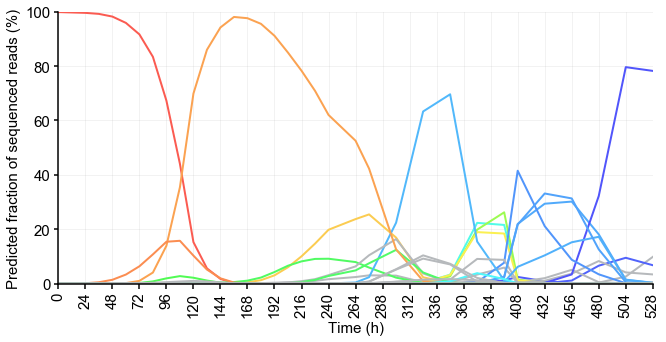

In [16]:
plot_inferred_trajectories(
    modelexp = 'modelexp_illumina', 
    model_id = '10', 
    out_fn = results_dir + 'ill_rl100_rs0.pdf', 
    title = '',
)

## reduced readlen

Saving to /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/results/fig_plot_full_trajectories/pb_rl1_rs0.pdf ...


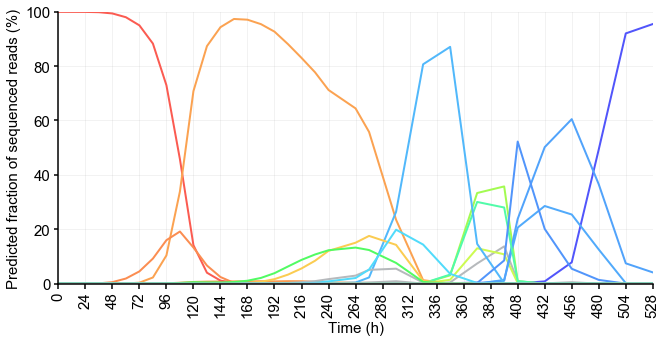

In [7]:
plot_inferred_trajectories(
    modelexp = 'modelexp_simple_rs', 
    model_id = '0', 
    out_fn = results_dir + 'pb_rl1_rs0.pdf', 
    title = '',
)

## added noise

In [8]:
def plot_inferred_trajectories_noisy(modelexp = 'modelexp_varynoisev2_rs', model_id = '0', out_fn = '', title = ''):
    prj_dir = '/ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/out/_fitness_from_reads_pt_multi/'
    df = pd.read_csv(f'{prj_dir}/{modelexp}/model_{model_id}/_final_genotype_matrix.csv', index_col = 0)
    df = df.rename(columns = idx_to_time)
    
    df['Abbrev genotype'] = df.index
    df = df.reset_index(drop = True)
    csv_out_fn = '.'.join(out_fn.split('.')[:-1]) + '.csv'
    df.to_csv(f'{csv_out_fn}')
    
    melt_df = df.melt(
        id_vars = 'Abbrev genotype',
        var_name = 'Time',
        value_name = 'Frequency (%)',
    )
    melt_df['Frequency (%)'] *= 100
    
    melt_df['Time'] = melt_df['Time'].astype(int)
    melt_df = melt_df.sort_values(by = 'Time', ascending = True)
    
    #
    import matplotlib
    matplotlib.rc('font', family = 'Arial', size = 15)
    matplotlib.rcParams['mathtext.fontset'] = 'custom'
    matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
    #
    
    fig, ax = plt.subplots(figsize = (9.5, 5))

    gts = sorted(list(set(df['Abbrev genotype'])))
    colors = sns.color_palette('hls', int(len(gts) * 1.5))
    palette = {gt: master_palette[gt] if gt in master_palette else '#b6b9bc' for gt in gts}
    #     for gt in gts:
    #         if gt not in master_palette:
    #             print(gt)
    
    sns.lineplot(
        x = 'Time',
        y = 'Frequency (%)',
        hue = 'Abbrev genotype',
        palette = palette,
        ci = None,
        data = melt_df,
#         linewidth = 1.5,
        linewidth = 2,
        ax = ax,
    )
    # plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
    ax.get_legend().remove()
    plt.xticks(rotation = 90)
    plt.grid(alpha = 0.2)
    plt.ylim(bottom = 0)
    plt.xlim(left = 0, right = 528)
    plt.xticks(np.arange(0, 528 + 24, 24))
    plt.xlabel('Time (h)')
    plt.ylabel('Predicted fraction of sequenced reads (%)')
    
    # if title != '':
    #     plt.title(title)
    
    plt.tight_layout()

    ##

    sns.despine(trim = False)
    ax.tick_params(length = 4.5, color = 'black', width = 1.5)
    for axis in ['bottom', 'left']:
        ax.spines[axis].set_linewidth(1.5)
        ax.spines[axis].set_color('black')

    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42

    print(f'Saving to {out_fn} ...')
    plt.savefig(out_fn, transparent = True, bbox_inches = 'tight')

    plt.show()
    plt.close()
    ##
    
    return


Saving to /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/results/fig_plot_full_trajectories/pb_rl1_noise0.05_rs0.pdf ...


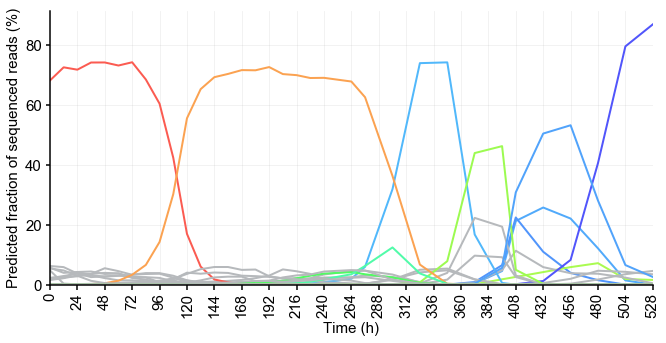

In [9]:
plot_inferred_trajectories_noisy(
    modelexp = 'modelexp_varynoisev2_rs', 
    model_id = '250', 
    out_fn = results_dir + 'pb_rl1_noise0.05_rs0.pdf', 
    title = '',
)

Saving to /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/results/fig_plot_full_trajectories/pb_rl1_noise0.03_rs0.pdf ...


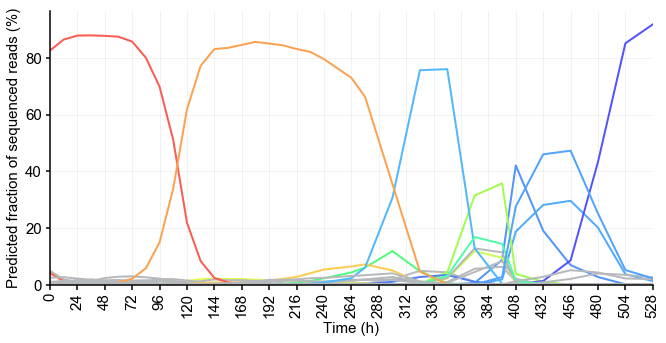

In [10]:
plot_inferred_trajectories_noisy(
    modelexp = 'modelexp_varynoisev2_rs', 
    model_id = '150', 
    out_fn = results_dir + 'pb_rl1_noise0.03_rs0.pdf', 
    title = '',
)